# Case Studides in Artificial Intelligence and Machine Learning
# Assignment - 4
## Ayush Nikulkumar Patel(9033358)  



### Environment Setup

Prerequisites

Ensure you have Python installed (>= 3.7)
Install Required Packages

Run the following command:

pip install pandas numpy matplotlib seaborn scikit-learn
Dataset Setup

The No-show Dataset

Download the dataset from:https://www.kaggle.com/datasets/muhammetgamal5/noshowappointmentskagglev2may2016csv   


In [21]:
# Install required dependencies (Include this in the first cell)
!pip install pandas numpy matplotlib seaborn scipy

In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind

# Load the dataset
file_path = "/content/noshowappointments-kagglev2-may-2016.csv"
df = pd.read_csv(file_path)

In [23]:
# Display dataset information
print(" Dataset Info:")
print(df.info())

# Display the first few rows
print("\n First 5 rows of the dataset:")
print(df.head())

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
None

 First 5 rows of the dataset:
      PatientId  AppointmentID Gender  

##  EXPLORATORY DATA ANALYSIS (EDA)

In [24]:
# Check for missing values

print("\n🔹 Missing Values in Each Column:")
print(df.isnull().sum())


🔹 Missing Values in Each Column:
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


In [38]:
 # Standardize column names (convert to lowercase and replace spaces with underscores)

df.columns = df.columns.str.lower().str.replace(" ", "_")

# Convert `scheduledday` and `appointmentday` to datetime format

df["scheduledday"] = pd.to_datetime(df["scheduledday"])
df["appointmentday"] = pd.to_datetime(df["appointmentday"])

print("\n First 10 rows after transformations:")
print(df.head(10))



 First 10 rows after transformations:
      patientid  appointmentid gender              scheduledday  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08+00:00   
1  5.589978e+14        5642503      M 2016-04-29 16:08:27+00:00   
2  4.262962e+12        5642549      F 2016-04-29 16:19:04+00:00   
3  8.679512e+11        5642828      F 2016-04-29 17:29:31+00:00   
4  8.841186e+12        5642494      F 2016-04-29 16:07:23+00:00   
5  9.598513e+13        5626772      F 2016-04-27 08:36:51+00:00   
6  7.336882e+14        5630279      F 2016-04-27 15:05:12+00:00   
7  3.449833e+12        5630575      F 2016-04-27 15:39:58+00:00   
8  5.639473e+13        5638447      F 2016-04-29 08:02:16+00:00   
9  7.812456e+13        5629123      F 2016-04-27 12:48:25+00:00   

             appointmentday  age      neighbourhood  scholarship  \
0 2016-04-29 00:00:00+00:00   62    JARDIM DA PENHA            0   
1 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   
2 2016-04-29 00:00:

<ipython-input-31-1a0629a64afa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="no-show", data=df, palette="Set2")


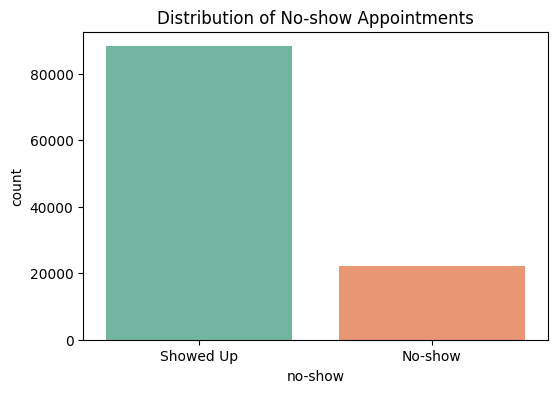

<ipython-input-31-1a0629a64afa>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="gender", data=df, palette="coolwarm")


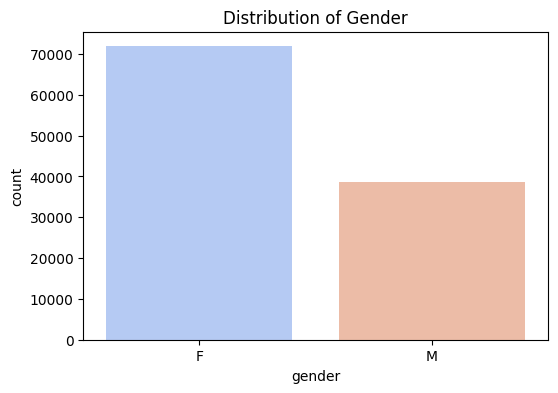

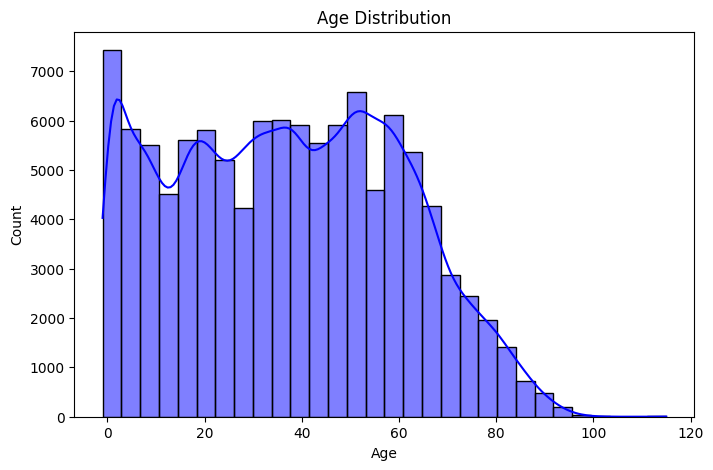

In [31]:
# No-show rate distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="no-show", data=df, palette="Set2")
plt.title("Distribution of No-show Appointments")
plt.xticks(ticks=[0, 1], labels=["Showed Up", "No-show"])
plt.show()

# Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="gender", data=df, palette="coolwarm")
plt.title("Distribution of Gender")
plt.show()

# Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["age"], bins=30, kde=True, color="blue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()


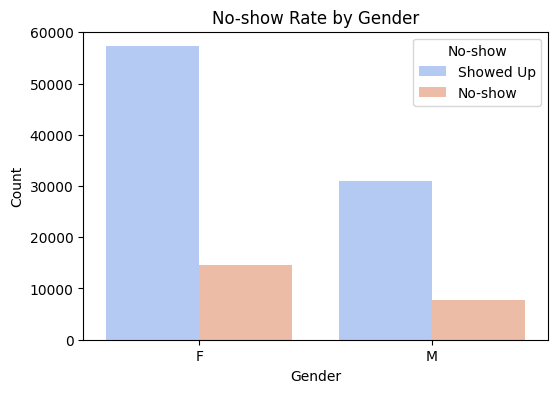

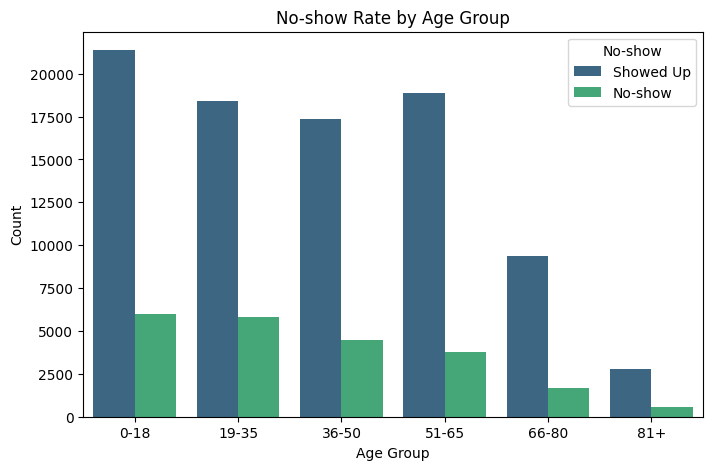

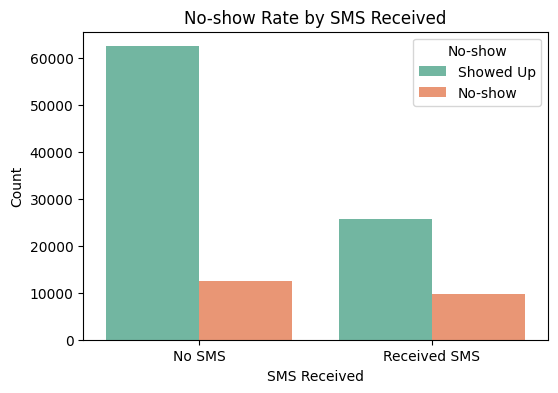

In [32]:
# No-show Rate by Gender

plt.figure(figsize=(6, 4))
sns.countplot(x="gender", hue="no-show", data=df, palette="coolwarm")
plt.title("No-show Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="No-show", labels=["Showed Up", "No-show"])
plt.show()

#  No-show Rate by Age Groups
# Define Age Groups

bins = [0, 18, 35, 50, 65, 80, 100]  # Age Ranges
labels = ["0-18", "19-35", "36-50", "51-65", "66-80", "81+"]
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, right=False)

plt.figure(figsize=(8, 5))
sns.countplot(x="age_group", hue="no-show", data=df, palette="viridis")
plt.title("No-show Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="No-show", labels=["Showed Up", "No-show"])
plt.show()

#  No-show Rate by SMS Received

plt.figure(figsize=(6, 4))
sns.countplot(x="sms_received", hue="no-show", data=df, palette="Set2")
plt.title("No-show Rate by SMS Received")
plt.xlabel("SMS Received")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["No SMS", "Received SMS"])
plt.legend(title="No-show", labels=["Showed Up", "No-show"])
plt.show()



## Statistical test of Comparisons

###Hypothesis Testing with Chi-Square Test

Hypothesis Definition

Null Hypothesis (H0): There is no significant relationship between No-show and SMS reminders.

Alternative Hypothesis (H1): There is a significant relationship between No-show and SMS reminders.

In [42]:
# Create a contingency table
contingency_table = pd.crosstab(df["sms_received"], df["no-show"])

# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print(" Significant relationship between SMS reminders and No-show behavior.")
else:
    print(" No significant relationship between SMS reminders and No-show behavior.")

Chi-Square Statistic: 1766.0676572637585
P-Value: 0.0
 Significant relationship between SMS reminders and No-show behavior.


### Conclusion


Based on the chi-square test results, the p-value is below 0.05, we reject the null hypothesis, indicating a meaningful correlation between No-show and SMS behaviour.